In [1]:
from pandas import DataFrame, read_csv
from pandas_datareader import data
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import random
import tensorflow as tf
from tensorflow.keras.layers import Dense,LSTM,Bidirectional,Dropout
from tensorflow.keras.models import Sequential

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [2]:
start = datetime.datetime(2020,1,1) # start date of the learning we choose this 
          # date as its the start of the 2020 year of which we are interested in
end = datetime.date.today() # end at the current date
stocks = ["nvda","aapl","amd","atvi","fb","nflx","irbt"] # stocks to be learned upon

In [13]:
batch_steps = 10 # this is how many days are needed for a prediction by default 
                 # we set it to 10
num_values = 95
usertick = pd.DataFrame()

class Batch:
  def __init__(self):
    x_batch = []
    y_val = []
    # this grabs a random number in the sequence of values
    for individual_stock in stocks:
      newticker = individual_stock
      usertick = data.DataReader(newticker,'yahoo',start,end)
      for batch_cells in range(num_values):
        random_number1 = random.randint(0,len(usertick)-(batch_steps+1))
        tmp_array = usertick['Close'][random_number1:random_number1+batch_steps].values
        x_batch.append(tmp_array)
        y_val.append(usertick['Close'][random_number1+batch_steps])
    self.x_batch = np.asarray(x_batch)[:,:,np.newaxis]
    self.y_val = np.asarray(y_val)

def create_batch():
  return Batch()

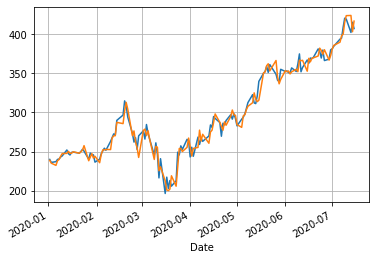

amount of days worth of data:  135
columns available:  ['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close']


In [14]:
# sample code on how this will all work on a smaller scale
newticker = "nvda"
plt.close()
usertick = data.DataReader(newticker,'yahoo',start,end)
usertick['Close'].plot( grid = True)
usertick['Open'].plot(grid=True)
plt.show()
print("amount of days worth of data: ",len(usertick)) 
print("columns available: ",list(usertick))

In [ ]:
for stock in stocks:
  newticker = "nvda"
  type(usertick)
  usertick = data.DataReader(newticker,'yahoo',start,end) 
 

In [16]:
batch = create_batch()

In [7]:
batch.x_batch.shape

(665, 15, 1)

In [8]:
n_steps = batch_steps
n_features = 1
n_outputs = 1
l_rate = 0.01

In [9]:
# model setup
model = tf.keras.Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
model.add(LSTM(300, activation='relu'))
model.add(Dropout(0.01))
model.add(Dense(32, activation= 'relu'))
model.add(Dense(n_outputs))
model.compile(optimizer='adam', loss='mae')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 50)                10400     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.fit(batch.x_batch, batch.y_val, epochs=  150, verbose= 1, validation_split=0.1, batch_size= 50, shuffle=True)

Epoch 1/150
12/12 [==============================] - 0s 28ms/step - loss: 193.0247 - val_loss: 5.0355
Epoch 2/150
12/12 [==============================] - 0s 9ms/step - loss: 39.2447 - val_loss: 2.2998
Epoch 3/150
12/12 [==============================] - 0s 9ms/step - loss: 17.7507 - val_loss: 3.4816
Epoch 4/150
12/12 [==============================] - 0s 9ms/step - loss: 11.0587 - val_loss: 2.6657
Epoch 5/150
12/12 [==============================] - 0s 11ms/step - loss: 9.2426 - val_loss: 3.1592
Epoch 6/150
12/12 [==============================] - 0s 9ms/step - loss: 8.1382 - val_loss: 2.7251
Epoch 7/150
12/12 [==============================] - 0s 9ms/step - loss: 8.2993 - val_loss: 2.6733
Epoch 8/150
12/12 [==============================] - 0s 8ms/step - loss: 8.6447 - val_loss: 3.3150
Epoch 9/150
12/12 [==============================] - 0s 9ms/step - loss: 9.5687 - val_loss: 2.0756
Epoch 10/150
12/12 [==============================] - 0s 9ms/step - loss: 7.5574 - val_loss: 1.8252
Ep

In [11]:
# demonstrate prediction
value_to_check = 600
x_input = batch.x_batch[value_to_check]
x_input = x_input.reshape((1, n_steps, n_features))
yhat = model.predict(x_input, verbose=0)
print(yhat)
print(batch.y_val[value_to_check])

[[35.5327]]
38.349998474121094


In [12]:
batch.x_batch[value_to_check]

array([[46.70000076],
       [47.99000168],
       [47.34999847],
       [49.15000153],
       [49.77999878],
       [48.04000092],
       [46.77000046],
       [39.81000137],
       [40.41999817],
       [40.18999863],
       [36.91999817],
       [40.97999954],
       [35.88000107],
       [37.        ],
       [33.90999985]])

This is the original testing done for creating a model

In [ ]:
n_steps_test = 6
n_features_test = 1
n_outputs_test = 1

In [ ]:
test_data = np.array([[0,1,2,3,4,5],[1,2,3,4,5,6],[2,3,4,5,6,7],[3,4,5,6,7,8],[4,5,6,7,8,9],[5,6,7,8,9,0],[6,7,8,9,0,1]]) # data which i will be training on
test_y = np.array([6,7,8,9,0,1,2]) # labels to be predicted

In [ ]:
test_data = test_data.reshape(test_data.shape[0],test_data.shape[1],n_features_test)

In [ ]:
test_data.shape

(7, 6, 1)

In [ ]:
# model setup
model = tf.keras.Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps_test, n_features_test)))
model.add(Dense(n_outputs_test))
model.compile(optimizer='adam', loss='mae')
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 50)                10400     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# training the model
model.fit(test_data, test_y, epochs=200, verbose=0)

In [ ]:
# demonstrate prediction
x_input = np.array([0,1,2,3,4,5])
x_input = x_input.reshape((1, n_steps_test, n_features_test))
yhat = model.predict(x_input, verbose=0)
print(yhat)

[[6.0206256]]
